In [81]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

csv0 = '../Presentation/clean/clean_od15.csv'
clean_od_2015 = pd.read_csv(csv0)

csv1 = '../Presentation/clean/clean_od16.csv'
clean_od_2016 = pd.read_csv(csv1)

csv2 = '../Presentation/clean/op_final_15.csv'
op_final_15 = pd.read_csv(csv2)

csv3 = '../Presentation/clean/op_final_16.csv'
op_final_16 = pd.read_csv(csv3)

csv4 = '../Presentation/clean/PAC_Scores_2015.csv'
PAC_Scores_2015 = pd.read_csv(csv4)

csv5 = '../Presentation/clean/PAC_Scores_2016_f.csv'
PAC_Scores_2016 = pd.read_csv(csv5)

csv6 = '../Presentation/clean/PAC_Scores_2016_f.csv'
PAC_Scores_2016 = pd.read_csv(csv6)

csv7 = '../Presentation/clean/op_pac_final_15.csv'
op_pac_final_15 = pd.read_csv(csv7)

csv8 = '../Presentation/clean/op_pac_final_16.csv'
op_pac_final_16 = pd.read_csv(csv8)

csv9 = '../Presentation/clean/state_op_final_15.csv'
state_op_final_15 = pd.read_csv(csv9)

csv10 = '../Presentation/clean/state_op_final_16.csv'
state_op_final_16 = pd.read_csv(csv10)

csv11 = '../Presentation/Clean/physician_ratings_bypac_15'
phys_ratings15_pac = pd.read_csv(csv11)

csv12 = '../Presentation/Clean/physician_ratings_bypac_16'
phys_ratings16_pac = pd.read_csv(csv12)

In [82]:
PAC_Scores_2015.head()

,Group PAC ID,Measure Performance Rate,Year,State
0,42105678,65.875,2015,PA
1,42111981,60.750,2015,MN
2,42128548,65.125,2015,TX
3,143378117,67.375,2015,NC
4,244133494,65.625,2015,MA


In [83]:
#rename the PAC ID column to match with op_pac_final
PAC_Scores_2015 = PAC_Scores_2015.rename(columns={"Group PAC ID":"PAC ID"})
#rename the PAC ID column for the 2016 file as well
PAC_Scores_2016 = PAC_Scores_2016.rename(columns={"Group PAC ID":"PAC ID"})

In [84]:
PAC_Scores_2015.head()

,PAC ID,Measure Performance Rate,Year,State
0,42105678,65.875,2015,PA
1,42111981,60.750,2015,MN
2,42128548,65.125,2015,TX
3,143378117,67.375,2015,NC
4,244133494,65.625,2015,MA


In [85]:
#clean PAC '15 scores to only include PAC ID for merge
pac_ratings_15 = PAC_Scores_2015[["PAC ID","Measure Performance Rate"]]
#clean PAC '16 scores to only include PAC ID of merge
pac_ratings_16 = PAC_Scores_2016[["PAC ID","Measure Performance Rate"]]


pac_ratings_15.head()

,PAC ID,Measure Performance Rate
0,42105678,65.875
1,42111981,60.750
2,42128548,65.125
3,143378117,67.375
4,244133494,65.625


In [86]:
#pac_ratings_15.sort_values("Measure Performance Rate", ascending=False)

In [87]:
pac_ratings_15.dtypes

PAC ID                        int64
Measure Performance Rate    float64
dtype: object

In [88]:
op_pac_final_15.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State
0,42100190.0,241.0,68.0,28.22,MI
1,42100273.0,232.0,22.0,9.48,TX
2,42101156.0,620.0,38.0,6.13,NV
3,42101164.0,336.0,56.0,16.67,MI
4,42101446.0,682.0,228.0,33.43,IL


In [89]:
#change the PAC ID data type from a float to int64 to match for 2015
op_pac_final_15["PAC ID"] = op_pac_final_15["PAC ID"].astype(np.int64)
#change the PAC ID data type from a float to int64 to match for 2016
op_pac_final_16["PAC ID"] = op_pac_final_16["PAC ID"].astype(np.int64)

In [90]:
op_pac_final_15.dtypes

PAC ID                       int64
Total Claim Count          float64
Opioid Claim Count         float64
Opioid Prescribing Rate    float64
State                       object
dtype: object

In [91]:
op_pac_final_15.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State
0,42100190,241.0,68.0,28.22,MI
1,42100273,232.0,22.0,9.48,TX
2,42101156,620.0,38.0,6.13,NV
3,42101164,336.0,56.0,16.67,MI
4,42101446,682.0,228.0,33.43,IL


In [92]:
#merge our pac '15 data with our 2015 Opioid data by PAC
merged_pac_15 = op_pac_final_15.merge(pac_ratings_15, on="PAC ID", how="outer")
merged_pac_15.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,68.0,28.22,MI,NaN
1,42100273,232.0,22.0,9.48,TX,NaN
2,42101156,620.0,38.0,6.13,NV,NaN
3,42101164,336.0,56.0,16.67,MI,NaN
4,42101446,682.0,228.0,33.43,IL,NaN


In [93]:
merged_pac_15.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,68.0,28.22,MI,NaN
1,42100273,232.0,22.0,9.48,TX,NaN
2,42101156,620.0,38.0,6.13,NV,NaN
3,42101164,336.0,56.0,16.67,MI,NaN
4,42101446,682.0,228.0,33.43,IL,NaN


In [94]:
len(op_pac_final_15)

14853

In [95]:
len(merged_pac_15)

15282

In [96]:
#drop NA values from our file
merged_pac_15clean = merged_pac_15.dropna(axis=0, how='any')
merged_pac_15clean.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate


In [97]:
#merge our pac '16 data with our 2016 Opioid data by PAC
merged_pac_16 = op_pac_final_16.merge(pac_ratings_15, on="PAC ID", how="outer")
merged_pac_16.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,77.0,31.95,MI,NaN
1,42102618,491.0,226.0,46.03,CA,NaN
2,42104168,5891.0,216.0,3.67,MN,NaN
3,42115404,9227.0,30.0,0.33,KY,NaN
4,42120784,30441.0,988.0,3.25,GA,NaN


In [98]:
#drop NA values from our file
merged_pac_16clean = merged_pac_16.dropna(axis=0, how='any')
merged_pac_16clean.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate


In [99]:
#In this exercise we are seeing if our phys_ratings data grouped by PAC ID is able to merge, this data took different measurements than the group ratings above
phys_ratings15_pac.head()

,PAC ID,Measure Performance Rate,Year
0,42100117,47.29,2015
1,42100190,85.00,2015
2,42100323,64.60,2015
3,42100968,100.00,2015
4,42101156,86.00,2015


In [100]:
#Drop the Year column for merge of 2015 data
phys_ratings15_pac = phys_ratings15_pac.drop(columns=["Year"])
phys_ratings15_pac.head()

,PAC ID,Measure Performance Rate
0,42100117,47.29
1,42100190,85.00
2,42100323,64.60
3,42100968,100.00
4,42101156,86.00


In [101]:
#merge the phy_ratings for 2015 by PAC with our Opioid Prescriber data from 2015
new_merged_2015 = op_pac_final_15.merge(phys_ratings15_pac, on="PAC ID", how="outer")
new_merged_2015.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,68.0,28.22,MI,85.0
1,42100273,232.0,22.0,9.48,TX,NaN
2,42101156,620.0,38.0,6.13,NV,86.0
3,42101164,336.0,56.0,16.67,MI,NaN
4,42101446,682.0,228.0,33.43,IL,NaN


In [102]:
#Important to note that the measure performance rates are ratings from Medicare from the data set that has physican ratings
#Whereas the data set we were trying to merged above was a different data set from patient ratings by Groups(PAC IDs)
#When we developed our opioid prescriber data frame , we used the PAC IDs from the Medicare Physican Ratings data sets, not the grouped data set
#drop NA values from our new merged file 
new_merged_2015clean = new_merged_2015.dropna(axis=0, how='any')
new_merged_2015clean.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,68.0,28.22,MI,85.0
2,42101156,620.0,38.0,6.13,NV,86.0
6,42102618,496.0,231.0,46.57,CA,100.0
9,42104929,11309.0,346.0,3.06,FL,100.0
20,42200099,2141.0,67.0,3.13,FL,100.0


In [103]:
#Check the length of the new data set
len(new_merged_2015clean)

3961

In [104]:
#In this exercise we are seeing if our 2016 phys_ratings data grouped by PAC ID is able to merge, this data took different measurements than the group ratings above
phys_ratings16_pac.head()

,PAC ID,Measure Performance Rate,Year
0,42100117,42.22,2016
1,42100133,68.50,2016
2,42100190,96.00,2016
3,42100273,1.00,2016
4,42100323,73.83,2016


In [105]:
#Drop the Year column for merge of 2016 data
phys_ratings16_pac = phys_ratings16_pac.drop(columns=["Year"])
phys_ratings16_pac.head()

,PAC ID,Measure Performance Rate
0,42100117,42.22
1,42100133,68.50
2,42100190,96.00
3,42100273,1.00
4,42100323,73.83


In [106]:
#merge the phy_ratings for 2016 by PAC with our Opioid Prescriber data from 2016
new_merged_2016 = op_pac_final_16.merge(phys_ratings16_pac, on="PAC ID", how="outer")
new_merged_2016.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,77.0,31.95,MI,96.0
1,42102618,491.0,226.0,46.03,CA,100.0
2,42104168,5891.0,216.0,3.67,MN,NaN
3,42115404,9227.0,30.0,0.33,KY,100.0
4,42120784,30441.0,988.0,3.25,GA,NaN


In [107]:
#Important to note that the measure performance rates are ratings from Medicare from the data set that has physican ratings
#Whereas the data set we were trying to merged above was a different data set from patient ratings by Groups(PAC IDs)
#When we developed our opioid prescriber data frame , we used the PAC IDs from the Medicare Physican Ratings data sets, not the grouped data set
#drop NA values from our new merged file 
new_merged_2016clean = new_merged_2016.dropna(axis=0, how='any')
new_merged_2016clean.head()

,PAC ID,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,State,Measure Performance Rate
0,42100190,241.0,77.0,31.95,MI,96.00
1,42102618,491.0,226.0,46.03,CA,100.00
3,42115404,9227.0,30.0,0.33,KY,100.00
5,42123713,4353.0,114.0,2.62,MN,45.67
8,42209470,6638.0,136.0,2.05,WI,95.00


In [108]:
len(new_merged_2016clean)

4550

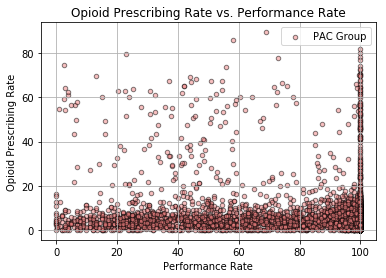

In [110]:
#Scatter Plot Example
new_merged_2016.plot.scatter(x="Measure Performance Rate", y='Opioid Prescribing Rate', color='LightCoral', 
                                           grid=True, alpha=0.5, edgecolors = 'black', label='PAC Group')
#Add title to our scatter plot along with an x-axis and y-axis title
plt.title("Opioid Prescribing Rate vs. Performance Rate")
plt.xlabel("Performance Rate")
plt.ylabel("Opioid Prescribing Rate")

plt.show()